In [ ]:
# Install necessary packages
!pip install tensorflow pandas numpy scikit-learn

# Import essential libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# If your data is in Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the dataset (assuming it's in CSV format)
# Adjust the path if you're using Google Drive or upload the file manually
df = pd.read_csv('/content/drive/MyDrive/PredictiveMaintenance/3.csv')

# Display the first few rows of the dataset
df.head()

,Unnamed: 0,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,...,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_51,rul
0,0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,201.3889,285.916667
1,1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,201.3889,285.900000
2,2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,...,31.770830,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,203.7037,285.883333
3,3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,...,31.510420,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,203.1250,285.866667
4,4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,...,31.510420,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,201.3889,285.850000


In [ ]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,...,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_51,rul
0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,...,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,201.3889,285.916667
1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,...,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,201.3889,285.900000
2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,...,31.770830,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,203.7037,285.883333
3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,...,31.510420,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,203.1250,285.866667
4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,...,31.510420,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,201.3889,285.850000


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Example DataFrame (replace df with your actual dataset)
# df = pd.read_csv('your_dataset.csv')  # Load your dataset

# Define the target column and feature columns
target_col = 'rul'  # Replace 'RUL' with the actual target column name
feature_cols = [col for col in df.columns if col != target_col and col != 'timestamp']  # Exclude timestamp and target columns

# Normalize the feature columns using MinMaxScaler
scaler = MinMaxScaler()
df[feature_cols] = scaler.fit_transform(df[feature_cols])

# Define the sequence length (number of previous time steps to use for prediction)
sequence_length = 50  # Example sequence length

# Create sequences and corresponding RUL targets
def create_sequences(data, target, sequence_length):
    X = []
    y = []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(target[i+sequence_length])
    return np.array(X), np.array(y)

# Prepare the sequences
X, y = create_sequences(df[feature_cols].values, df[target_col].values, sequence_length)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Verify the shapes
print(X_train.shape, y_train.shape)

# Define the LSTM model with hyperparameter tuning
def build_model(units_lstm_1=128, units_lstm_2=64, dropout_rate=0.2, learning_rate=0.0001):
    model = Sequential()

    # First LSTM layer with dropout regularization
    model.add(LSTM(units=units_lstm_1, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(dropout_rate))

    # Second LSTM layer
    model.add(LSTM(units=units_lstm_2, return_sequences=False))
    model.add(Dropout(dropout_rate))

    # Output layer for RUL prediction
    model.add(Dense(1))

    # Compile the model with Adam optimizer and mean squared error loss
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')

    return model

# Hyperparameters to tune
params = {
    'units_lstm_1': 128,  # Experiment with values: 128, 256
    'units_lstm_2': 64,   # Experiment with values: 64, 128
    'dropout_rate': 0.2,  # Experiment with values: 0.1, 0.3
    'learning_rate': 0.0001  # Experiment with values: 0.0001, 0.0005, 0.001
}

# Build the model with tuned hyperparameters
model = build_model(**params)

# Display the model summary
model.summary()

# Hyperparameters for training
batch_size = 32  # Experiment with different batch sizes: 16, 32, 64
epochs = 50  # Experiment with different numbers of epochs

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=batch_size, epochs=epochs)

# Evaluate the model on the test set
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

(133112, 50, 50) (133112,)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 50, 128)             │          91,648 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 50, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 141,121 (551.25 KB)

 Trainable params: 141,121 (551.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
4160/4160 ━━━━━━━━━━━━━━━━━━━━ 46s 10ms/step - loss: 147505.0312 - val_loss: 34758.8438
Epoch 2/50
4160/4160 ━━━━━━━━━━━━━━━━━━━━ 78s 10ms/step - loss: 130391.3750 - val_loss: 28210.8379
Epoch 3/50
4160/4160 ━━━━━━━━━━━━━━━━━━━━ 40s 10ms/step - loss: 116821.3203 - val_loss: 23038.7520
Epoch 4/50
4160/4160 ━━━━━━━━━━━━━━━━━━━━ 38s 9ms/step - loss: 104897.1484 - val_loss: 19227.9570
Epoch 5/50
4160/4160 ━━━━━━━━━━━━━━━━━━━━ 41s 9ms/step - loss: 94538.3125 - val_loss: 16744.6035
Epoch 6/50
4160/4160 ━━━━━━━━━━━━━━━━━━━━ 43s 9ms/step - loss: 84644.0156 - val_loss: 15555.8525
Epoch 7/50
4160/4160 ━━━━━━━━━━━━━━━━━━━━ 40s 9ms/step - loss: 77210.8203 - val_loss: 15609.0439
Epoch 8/50
4160/4160 ━━━━━━━━━━━━━━━━━━━━ 42s 9ms/step - loss: 70615.8203 - val_loss: 16815.5430
Epoch 9/50
4160/4160 ━━━━━━━━━━━━━━━━━━━━ 41s 9ms/step - loss: 65553.9531 - val_loss: 19030.5859
Epoch 10/50
4160/4160 ━━━━━━━━━━━━━━━━━━━━ 41s 9ms/step - loss: 61742.9922 - val_loss: 22030.9160
Epoch 11/50
4160/4160 

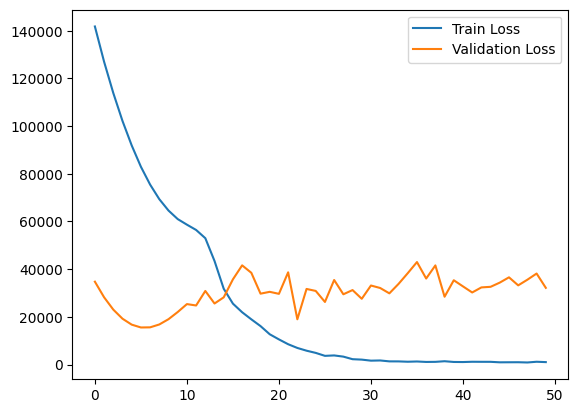

In [ ]:
# Plot the training and validation loss over time
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [ ]:
# Evaluate the model on the test set
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')

In [ ]:
# Predict RUL for the test data
y_pred = model.predict(X_test)

# Compare predicted RUL with actual RUL
for i in range(5):
    print(f"Actual RUL: {y_test[i]}, Predicted RUL: {y_pred[i][0]}")